# 6.2 Modelle sozialer Beeinflussung

Im Folgenden werden wir die ersten drei Liniendiagramme und die jeweils zugrunde liegenden Simulationen im Text "Modelle sozialer Beeinflussung" aus dem Jahr 2015 von Michael Mäs replizieren. Den Text findest du u.a. [hier](https://link.springer.com/chapter/10.1007%2F978-3-658-01164-2_34). Das erste Modell werden wir im Folgenden gemeinsam programmieren, die zwei anderen sollen als Übungsaufgabe nachgebaut werden. 

````{admonition} Pro-Tipp
:class: tip

Bevor du an dieser Stelle weiterliest, solltest du den Text von Michael Mäs vollständig gelesen haben. Du findest den Text z.B. [hier](https://link.springer.com/chapter/10.1007%2F978-3-658-01164-2_34).

Mäs M. (2015) Modelle sozialer Beeinflussung. In: Braun N., Saam N. (eds) Handbuch Modellbildung und Simulation in den Sozialwissenschaften. Springer VS, Wiesbaden. https://doi.org/10.1007/978-3-658-01164-2_34

````

In den klassischen Modellen sozialer Beeinflussung wird der Einfluss verschiedener Beeinflussungsmechanismen der Akteure auf die Meinungsmakrostruktur in der Population (z.B. Polarisierung vs. Konsens) untersucht. Die Akteure besitzen dabei eine *Meinung* zu einem bestimmten Thema, welche als Zahl z.B. zwischen 1 und 10 bzw. 0 und 1 repräsentiert wird. Während der Simulation werden die Meinungen der Agenten entsprechend der implementierten Beeinflussungsmechanismen auf der Mikroebene verändert. Die *Veränderung der Meinung* eines Agenten ergibt sich dabei im Kern eines jeden Modells des Textes von Mäs als durchschnittlicher, gewichteter Meinungsunterschied zwischen eines Agenten und der gesamten Population von Agenten. Im Text von Mäs wird das formal so dargestellt:

$$ \Delta O_{i,d,t} = \frac{\sum_{j=1}^{N}(o_{j,d,t}-o_{i,d,t}) w_{i,j,t}}{\sum_{j=1}^{N}|w_{i,j,t}|} $$

```{warning}

In der Original-Formel im Text ist ein kleiner Fehler. Unter dem Bruchstrich muss korrekterweise der **absolute Betrag** der jeweiligen Gewichte $ w_{i,j,t} $ aufsummiert werden, da sich sonst negative und positive Gewichte gegenseitig aufheben würden. Daher habe ich hier im Gegensatz zur Original-Formel $ | w_{i,j,t} | $ geschrieben.)

```

Da diese Formel essentiell ist und in jedem der im Folgenden zu replizierenden Modelle sozialer Beeinflussung verwendet wird, schauen wir uns diese kurz genauer an. Hier die Bedeutung einiger Einzelteile der Funktion:

$ O_{i,d,t} $ = **Meinung von Agent $i$** über das Thema $d$ zum Zeitpunkt $t$

$ O_{j,d,t} $ = **Meinung von Agent $j$** über das Thema $d$ zum Zeitpunkt $t$

$ \Delta O_{i,d,t} $ = **Veränderung der Meinung des Agenten $i$** über das Thema $d$ zum Zeitpunkt $t$

$ (o_{j,d,t}-o_{i,d,t}) $ = **Meinungsunterschied** zwischen Agent $i$ und Agent $j$ über das Thema $d$ zum Zeitpunkt $t$

$ w_{i,j,t} $ = **Gewicht der Beziehung** zwischen Agent $i$ und $j$ zum Zeitpunkt $t$.

$ (o_{j,d,t}-o_{i,d,t}) w_{i,j,t} $ = **gewichteter Meinungsunterschied** zwischen Agent $i$ und Agent $j$ über das Thema $d$

$ \sum_{j=1}^{N}(o_{j,d,t}-o_{i,d,t}) w_{i,j,t} $ = **Summe aller gewichteten Meinungsunterschiede** zwischen Agent $i$ und Population ...

$ | w_{i,j,t} |$ = **Betrag des Gewichts der Beziehung** zwischen Agent $i$ und $j$ zum Zeitpunkt $t$.

$ \sum_{j=1}^{N}|w_{i,j,t}| $ = Summe der absoluten Beträge aller Gewichte


Ein kleines Beispiel zum besseren Verständnis der obigen Formel: Angenommen eine Population von Agenten besteht aus Peter und Hans. Peter vertritt die Meinung $1$, Hans vertritt die Meinung $5$. Angenommen Peter wird in diesem Zeitschritt *beeinflusst*, sodass für ihn die entsprechende Meinungsveränderung mit der obigen Formel ermittelt werden muss. Peter würde man in diesem Fall den *fokale* Agenten/Akteur bezeichnen.

Beginnen wir **oberhalb des Bruchstriches** der Formel mit der Berechnung der Meinungsunterschiede zwischen Peter und dem Rest der Population. Da die Population nur aus Peter und Hans besteht, muss Peter den Meinungsunterschied zwischen ihm und Hans sowie zwischen ihm und ihm betrachten. Der Meinungsunterschied zwischen Hans und Peter ergibt sich (aus Sicht von Peter) als $5 - 1 = 4$. Da Peter und Hans gut befreundet sind, gewichtet Peter die Meinung von Hans bzw. die Meinungsdifferenz zwischen ihm und Hans mit einem Gewicht von $1$ d.h. zu 100%. Da Peter selbst zur Population gehört, wird auch der Meinungsunterschied zwischem seiner Meinung und seiner Meinung berechnet: $ 1 - 1 = 0$. Peter schätzt seine eigene Meinung genauso stark wie die Meinung von Hans. Daher wird auch seine eigene Meinung bzw. die Meinungsdifferenz mit sich selbst mit einem Gewicht von $1$ gewichtet. Diese beiden gewichteten Meinungsunterschiede werden dann addiert. Oberhalb des Bruchstriches steht also insgesamt $ \sum_{j=1}^{N}(5 - 1) * 1 + (1 - 1) * 1 = 4 + 0 = 4 $. Dies ist die Summe aller gewichteten Meinungsunterschiede zwischen Peter und allen Agenten in der Population d.h. Hans und Peter. **Unterhalb des Bruchstriches** steht die Summer aller Gewichte bzw. ihrer absoluten Beträge: $1 + 1 = 2$. 

Teilen wir den Wert oberhalb des Bruchstriches durch den Wert unterhalb des Bruchstriches, erhalten wir den durchschnittlichen gewichteten Meinungsunterschied: $ \frac {4}{2} = 2$. Da die Beeinflussungsgewichte beide auf $1$ gesetzt wurden, ist dies nichts anderes als ein ganz normaler Durchschnitt. In diesem Fall eben ein Durchschnitt der Meinungsunterschiede. Das Ergebnis $2$ ist nun jedoch noch nicht die *neue Meinung* von Peter an sich, sondern nur die aufgrund der sozialen Beeinflussung von ihm vollzogene *Meinungsveränderung*. Peter hatte zu Beginn die Meinung $1$. Die Veränderung der Meinung wird auf den aktuellen Zustand der Meinung aufaddiert: $1 + 2 = 3$. Die neue Meinung von Peter ist somit $3$. Diese Meinung liegt nun genau in der Mitte zwischen Peters alter Meinung und der Meinung von Hans.

Wenn Peter den Meinungsunterschied zwischen ihm und Hans nur mit einem Gewicht von 0.5 gewichten würde, dann würde die neue Meinung von Peter näher an seiner alten Meinung liegen: 

$$ \frac{(5-1)*0.5 + (1-1)*1}{0.5 + 1} = \frac{2 + 0}{0.5 + 1} = \frac{2}{1.5} = 1.3334 $$

Die Meinung von Peter würde sich dann nur um den Wert $1.3334$ ändern und somit zu $1 + 1.3334 = 2.3334$ werden.

In den hier vorgestellten Modellen sozialer Beeinflussung bleibt die Berechnung der Meinung bzw. der Meinungsveränderung an sich immer dieselbe. Sie wird immer hauptsächlich mit der obigen Formel berechnet. Was sich von Modell zu Modell ändert ist v.a. die Berechnung der Beeinflussungsgewichte. In diesem Beispiel haben sich die Beeinflussungsgewichte z.B. durch die Freundschaft ergeben. In den nun folgenden Modellen ergeben sich die Beeinflussungsgewichte durch 
1. direkten Kontakt in einem einfachen Netzwerk (Modell 1)
2. Homophilie (Modell 2) 
3. negative soziale Beeinflussung bzw. Distinktion (Modell 3)

## Modell 1 - das klassische Modell

Im Folgenden programmieren wir das Modell, welches Abbildung 1 auf S.975 des Textes von Michael Mäs generiert. Wie gesagt, in allen Modellen wird die soziale Beeinflussung im Kern auf Basis der oben aufgestellten Formel berechnet. Was sich zwischen den Modellen v.a. ändert, sind die Regeln zur Berechnung der Beeinflussungsgewichte, wodurch die jeweiligen Beeinflussungsmechanismen implementiert werden. In Modell 1 werden die Beeinflussungsgewichte derart berechnet, dass ein Agent nur von seinen direkten Nachbarn (und sich selbst) beeinflusst werden kann. Da die *Welt* der Agenten sich entlang einer Linie erstreckt (welche an den Enden nicht zu einem Ring zusammengeschlossen wird), hat jeder Agent zwischen 1 und 2 Nachbarn. Die Anfangsmeinung eines jeden Agenten ergibt sich aus dessen Position in der Reihe. Die durch eine solche Modellspezifikation entstehende "Meinungsdynamik" sieht man in der untigen Abbildung. Das Ziel ist nun, genau eine solche Meinungsdynamik zu reproduzieren. In den folgenden Übungsaufgaben ist es dann deine Aufgabe, den Code von Modell 1 so zu modifizieren, dass damit auch Modell 2 und Modell 3 repliziert werden können.

![](img/modell_soz_be_1.png)

**QUELLE:** Mäs M. (2015) Modelle sozialer Beeinflussung. In: Braun N., Saam N. (eds) Handbuch Modellbildung und Simulation in den Sozialwissenschaften. Springer VS, Wiesbaden. https://doi.org/10.1007/978-3-658-01164-2_34

Für die Replikation der von Mäs vorgestellten Modelle sozialer Beeinflussung in Python gibt es eine ganze Reihe möglicher Herangehensweisen. Man kann sich eine ganze Reihe an unterschiedlichen Varianten vorstellen, wie man z.B. die Agenten darstellt oder den Code strukturiert. Ich schlage an dieser Stelle vor, den Code in vier primäre Bereiche zu unterteilen, welche es erlauben, durch relativ wenig Code-Veränderung und Code-Doppelung alle Modelle zu replizieren. Die vier Bestandteile der Simulation bestehen aus drei Funktionen sowie einem Code-Block zur Initialisierung der Population und Starten der Simulation mittels Funktion. Im Folgenden beschreibe ich zunächst, auf welche Weise die Agenten repräsentiert werden und gehe dann die Funktionsweise der einzelnen Funktionen, aus welchen die Simulation besteht, durch. Danach initialisiere ich die Population und führe das Modell aus.

### Die Agenten

Jeder Agent wird als `dict` mit vier Attributen erstellt. Unten sieht man einen beispielhaften Agenten, von welchem vor jedem Simulationsdurchlauf eine Population entsprechender Größe erstellt wird. Als Platzhalter für konkrete Werte sind unten teils die erwarteten Datentypen als Platzhalter eingetragen.

In [1]:
agent = {
    "position": int, # gibt die Position in Populations-Liste an
    "opinion": float, # gibt die Meinung zwischen 0 und 1 an
    "temporary_opinion_weight": float, # gibt das Meinungsgewicht in Relation zum aktuellen fokalen agenten an
    "opinion_history": [], # archiviert die vergangenen Meinungen des Agenten
}

- Das Attribut `"position"` gibt die Position innerhalb der Populationsliste an. Diese wird zu Beginn festgelegt und ändert sich dann nicht mehr.
- Die `"opinion"` gibt die aktuelle Meinung des Agenten an. Diese kann einen `float` von 0 bis 1 annehmen. Damit diese Implementierung in allen Modellen eingesetzt werden kann, werden auch in Modell 1 die Meinungen der Agenten auf einer Skala von 0 bis 1 repräsentiert, statt wie im Original-Text von 1 bis 10. Dies sollte auf das Simulationsergebnis keinen nennenswerten Einfluss haben.
- Das `"temporary_opinion_weight"` stellt das Beeinflussungsgewicht der eigenen Meinung in Relation zum aktuellen fokalen Agenten dar. Dieses Gewicht wird während der Simulation in jedem Zeitschritt neu ermittelt, da in jedem Zeitschritt sich der fokale Agent verändert bzw. zufällig neu gezogen wird.
- Die `"opinion_history"` ist eine Liste, in welcher in jedem Zeitschritt die aktuelle Meinung des Agenten angehängt wird, sodass am Ende der Simulation der gesamte Meinungsverlauf eines jeden Agenten während der Simulation nachvollzogen werden kann. Diese Datenreihe wird letztlich nach der Simulation für jeden Agenten grafisch in den Diagrammen dargestellt.

### Die Hauptfunktion

Der grobe Ablauf der Simulation bzw. der Modelle sozialer Beeinflussung lautet so:
Für eine Population von Agenten wird in jedem Zeitschritt ein Agent zufällig ausgewählt. Dieser zufällig ausgewählte Agent ist der sogenannte fokale Agent, dessen Meinung in diesem Zeitschritt durch die anderen Populationsmitglieder beeinflusst wird. Wie dieser Agent beeinflusst wird bestimmt sich zum einen durch die obige Beeinflussungsformel und zum anderen durch die in den verschiedenen Modellen verwendeten Arten, die Beeinflussungsgewichte der Populationsmitglieder in Bezug zum fokalen Agenten zu ermitteln.
Während des Simulationsdurchlaufs werden in jeder Runde die Meinungen der Agenten archiviert, um nach der Simulation den Meinungsverlauf der Agenten in Diagrammen darzustellen. Nach der Simulation werden dann die Meinungsverläufe aller Agenten grafisch dargestellt.

Dieser soeben beschriebene, grobe Ablauf der Simulation wird von der Funktion `run_model()` umgesetzt. Die Funktion `run_model()` ist die Hauptfunktion und führt die gesamte Simulation aus. Allerdings werden einige Teilschritte der Simulation in weitere Funktionen ausgelagert, um einerseits den Code übersichtlich zu halten und andererseits die Modularität des Codes sicherzustellen. Schauen wir uns die Funktion kurz an:

- Die Funktion `run_model()` erwartet zwei Inputs. Für das Argument `population` erwartet die Funktion eine Liste mit Agenten, welche in der oben vorgestellten Form vorliegen. Das Argument `ticks` gibt die Anzahl der zu simulierenden Zeitschritte an.


- Zu Beginn der Funktion startet ein For-Loop, wobei jede Runde des For-Loops einen Zeitschritt darstellt.


- Innerhalb des For-Loops wird zunächst der fokale Agent per Zufallswahl aus der Population gezogen.


- Mit der Funktion `get_opinion_weights_1()` werden für jeden Agenten die entsprechenden Gewichte für die Beeinflussung der Meinung des fokalen Agenten nach den Regeln von Modell 1 ermittelt. Die ermittelten Gewichte werden jeweils den Agenten unter dem Attribut `"temporary_opinion_weight"` eingespeichert. Da die Agenten veränderbare Objekte sind, muss hat die Funktion `get_opinion_weights_1()` keinen expliziten Output. Statdessen werden die Veränderungen direkt bei den Agenten eingespeichert. Die Funktion `get_opinion_weights_1()` wird weiter unten noch genauer vorgestellt. In den Übungsaufgaben musst du später u.a. an dieser Stelle die Funktion `run_model()` so modifizieren, dass wahlweise auch die Gewichte nach den Regeln von Modell 2 oder Modell 3 ermittelt werden können.


- Nachdem für jeden Agenten das Meinungsgewicht in Bezug zum momentanen fokalen Agenten ermittelt wurde, wird im nächsten Schritt mithilfe der Funktion `change_opinion()` die Meinung des fokalen Agenten auf Basis der "obigen Formel" verändert. Die veränderte Meinung wird innerhalb der Funktion direkt dem fokalen Agenten eingespeichert, sodass auch diese Funktion keinen expliziten Output aufweist.


- Im letzten Schritt innerhalb des For-Loops wird mittels eines weiteren For-Loops die gesamte Population durchgegangen und für jeden Agenten die aktuelle Meinung unter dessen Attribut `"opinion_history"` archiviert.


- Nach Abschluss des For-Loops *durch die Zeit* und somit nach der eigentlichen Simulation, werden die Simulationsergebnisse grafisch dargestellt. Dazu werden alle Agenten per For-Loop durchgegangen und für jeden Agenten dessen `"opinion_history"` in ein Matplotlib-Diagramm eingezeichnet.

In [2]:
import random
import matplotlib.pyplot as plt


def run_model(population, ticks):

    """
    Hauptfunktion zur Ausführung der Modelle sozialer Beeinflussung.
    In der aktuellen Form repliziert diese Funktion Modell 1. 
    Durch leichte Modifikationen könnte diese Funktion aber auch wahlweise 
    Modell 2 oder Modell 3 replizieren.
    """

    # für jeden Zeitschritt
    for t in range(ticks):

        # zufälligen Agenten ziehen
        focal_agent = random.choice(population)
        
        # für jeden Agenten Meinungsgewicht in Relation zum fokalen Agenten ermitteln
        get_opinion_weights_1(focal_agent, population)
        
        # Meinung des fokalen Agenten beeinflussen
        change_opinion(focal_agent, population)

        # Für jeden Agenten
        for agent in population:
            # Aktuelle Meinung archivieren
            agent["opinion_history"].append(agent["opinion"])
    
    
    # Output-Daten plotten
    for agent in population:
        plt.plot(agent["opinion_history"])
    plt.show()

### Die Gewichte berechnen

Innerhalb der Hauptfunktion `run_model()` werden mittels der Funktion `get_opinion_weights_1()` für jeden Agenten das entsprechende Beeinflussungsgewicht bezüglich des fokalen Agenten nach den Regeln von Modell 1 berechnet. Modell 1 besagt, dass Agenten allein von ihren Nachbarn (und sich selbst) beeinflusst werden. Dieser Part wurde als eigene Funktion ausgelagert, damit dieser in der Hauptfunktion später evlt. auch durch andere Funktionen, welche die Gewichte nach den Regeln von Modell 2 oder Modell 3 berechnen, ersetzt werden kann bzw. zwischen verschiedenen Funktionen zur Berechnung der Gewichte umgeschaltet werden kann. Schauen wir uns die Funktion `get_opinion_weights_1()` kurz an:

- Die Funktion `get_opinion_weights_1()` erwartet für das Argument `focal_agent` den in der Funktion `run_model()` zufällig ausgewählten, fokalen Agenten. Für das Argument `population` erwartet sie die gesamte Population an Agenten in einer Liste.


- Die Funktion geht per For-Loop jeden Agenten der eingegeben Liste `population` durch.


- Im ersten Schritt des For-Loops wird für jeden Agenten die räumliche Distanz zum fokalen Agenten anhand der Positionen ermittelt. Dazu wird der absolute Betrag der Differenz zwischen der Position des Agenten und des fokalen Agenten berechnet.


- Im zweiten Schritt des For-Loops wird geprüft, ob die Distanz kleiner oder gleich 1 ist. Falls die Distanz 1 ist, dann handelt es sich um einen direkten Nachbarn des fokalen Agenten. Falls die Distanz 0 ist, dann ist *der* Agent der fokale Agent selbst. In beiden Fällen wird ein Beeinflussungsgewicht von 1 ermittelt und dem entsprechenden Agenten als `"temporary_opinion_weight"` eingespeichert. Falls die Distanz größer als 1 ist, dann wird ein Beeinflussungsgewicht von 0 eingespeichert.

In [3]:
def get_opinion_weights_1(focal_agent, population):
    
    """
    Ermittelt für jeden Agenten das eigene Gewicht der Beeinflussung des fokalen Agenten 
    und speichert dieses für jeden Agenten unter dem Attribut `"temporary_opinion_weight"` ein.
    Ist ein Agent ein direkter Nachbar des fokalen Agenten, dann wird die Meinung dieses Agenten mit 1 gewichtet.
    Auch sich selbst weist der fokale Agent ein Gewicht von 1 zu.
    Allen anderen Agenten wird ein Gewicht von 0 zugewiesen.
    """
    
    for agent in population:
        
        # Distanz zwischen Position des fokalen Agenten i und des Agenten j berechnen
        distance = abs(agent["position"] - focal_agent["position"])

        # Wenn Distanz kleinergleich 1
        if distance <= 1:
            agent["temporary_opinion_weight"] = 1

        # Ansonsten:
        else:
            agent["temporary_opinion_weight"] = 0

### Die Meinung verändern

Mit der Funktion `change_opinion()` wird die Meinung des fokalen Agenten entsprechend verändert. Im Grunde ist diese Funktion die Implementierung der oben besprochenen Formel, wobei in diese Formel die entsprechenden Werte eingesetzt werden, die Formel ausgerechnet wird und schließlich die Meinung des fokalen Agenten verändert wird. Dieser Mechanismus ist in allen Modellen derselbe, sodass diese Funktion auch nicht nur in Modell 1, sondern auch in den anderen Modellen verwendet werden kann. Schauen wir uns die Funktion kurz an:

- Genau wie die Funktion `get_opinion_weights_1()` erwartet die Funktion mit den Argumenten `focal_agent` und `population` den fokalen Agenten des aktuellen Zeitschritts und die gesamte Populationsliste.


- **1. Oberhalb des Bruchstriches**: Im ersten Part der Funktion wird der obere Teil der oben besprochenen Formel implementiert. Für jeden Agenten wird der Meinungsunterschied zum fokalen Agenten ermittelt und anschließend mit dem entsprechenden Beeinflussungsgewicht gewichtet. Schließlich werden alle gewichteten Meinungsunterschiede in der Variable `sum_of_weighted_opinion_diffs` aufsummiert.


- **2. Unterhalb des Bruchstriches**: Im zweiten Schritt der Funktion wird der Teil unterm Bruchstrich berechnet. Dabei werden die absoluten Beträge aller Beeinflussungsgewichte aller Agenten in der Variable `sum_of_abs_opinion_weights` aufsummiert.


- **3. Bruch ausrechnen**: Hier wird der Bruch ausgerechnet und somit die gewichtete, durchschnittliche Meinungsdifferenz zwischen dem fokalen Agenten und der Population berechnet.


- **4. Meinung beim fokalen Agenten verändern**: In diesem letzten Schritt wird die Meinung des Agenten auf Basis der vorher berechneten Meinungsdifferenz verändert. Da es in manchen Modellen vorkommen kann, dass die Meinung des Agenten nach der Meinungsveränderung außerhalb der eigentlichen Meinungsskala liegt, wird abschließend geprüft, ob die Meinung kleiner 0 oder größer 1 ist. Falls sie kleiner als 0 ist, wird sie auf 0 gesetzt. Falls sie größer als 1 ist, wird sie auf 1 gesetzt.

In [4]:
def change_opinion(focal_agent, population):
    
    """Ermittelt den Wert der Meinungsveränderung und verändert entsprechend die Meinung des Agenten."""
    
    ############################################################
    # 1. Oberhalb des Bruchstriches
    ############################################################
      
    # Summierungsvariable für gewichtete Meinungsunterschiede
    sum_of_weighted_opinion_diffs = 0
    
    # Für jeden Agenten in Population
    for agent in population:
        
        # Meinungsdifferenz berechnen
        opinion_diff = agent["opinion"] - focal_agent["opinion"]
        
        # Meinungsdifferenz mit entsprechendem Gewicht gewichten
        weighted_opinion_diff = opinion_diff * agent["temporary_opinion_weight"]
        
        # gewichtete Meinungsdifferenz aufsummieren
        sum_of_weighted_opinion_diffs += weighted_opinion_diff
    
    
    ############################################################
    # 2. Unterhalb des Bruchstriches
    ############################################################
    
    # Summierungsvariable für absolute Beträge der Gewichte
    sum_of_abs_opinion_weights = 0
    
    # für jeden Agenten in Population
    for agent in population:
        
        # absoluten Betrag des Gewichts ermitteln
        abs_opinion_weight = abs(agent["temporary_opinion_weight"])
        
        # auf Summe aufsummieren
        sum_of_abs_opinion_weights += abs_opinion_weight
    
    
    ############################################################
    # 3. Bruch ausrechnen
    ############################################################
    
    # Meinungsveränderung berechnen
    opinion_change = sum_of_weighted_opinion_diffs / sum_of_abs_opinion_weights
    
    
    ############################################################
    # 4. Meinung beim fokalen Agenten verändern
    ############################################################
    
    # neue Meinung berechnen aus momentaner Meinung und Meinungsveränderung
    focal_agent["opinion"] = focal_agent["opinion"] + opinion_change

    # Meinung in zulässigem Bereich halten
    if focal_agent["opinion"] < 0:
        focal_agent["opinion"] = 0
    elif focal_agent["opinion"] > 1:
        focal_agent["opinion"] = 1

### Initialisierung und Ausführung

Nachdem nun oben alle Funktionen definiert wurden, wird im letzten Schritt alles für die Ausführung der Simulation vorbereitet und schließlich die Funktion `run_model()` ausgeführt.

- Vor dem Ausführen der Simulation muss zunächst die Population erstellt werden. In Modell 1 besteht diese aus 10 Agenten, welche auf Meinungen von 1 bis 10 bzw. von 0.1 bis 1 aufweisen (wie oben bereits erwähnt, werden in dieser Replikation auch in Modell 1 die Meinungen auf einer Skala von 0 bis 1 dargestellt, sodass hier nicht Agenten mit den Meinungen von 1 bis 10, sondern mit den Meinungen von 0.1 bis 1 verwendet werden). Die Agenten werden innerhalb eines For-Loops nacheinander erstellt und der Liste `population` angehängt. Da sich das Beeinflussungsgewicht erst nach dem Start der Simulation ergibt, wird jedem Agenten zu Beginn der Platzhalter `None` auf dem Attribut `"temporary_opinion_weight"` eingespeichert.


- Nachdem die Population erstellt ist, kann an die Funktion `run_model()` übergeben werden und die Simulation gestartet werden.


- Unten wird das Ergebnis der Simulation im Diagramm angezeigt. Jede Linie zeigt den Meinungsverlauf eines Agenten über den gesamten Verlauf der Simulation. Beeinflussen sich die Agenten nach den Regeln von Modell 1, kann man eine Konsensbildung beobachten. Insgesamt sieht man, dass das Modell 1 erfolgreich repliziert werden konnte.

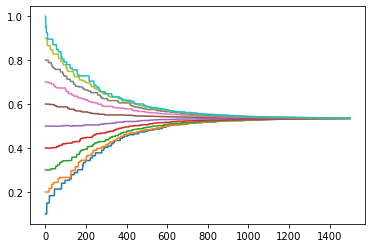

In [5]:
# Population erstellen
population = []
for i in range(10):
    agent = {
        "position": i,
        "opinion": (i+1)/10,
        "temporary_opinion_weight": None,
        "opinion_history": [],
    }
    population.append(agent)

# Modell ausführen
run_model(population=population, ticks=1500)

## Aufgabe 1

- Lies den Text von Michael Mäs.


## Aufgabe 2

- Versuche den obigen Code so gut es geht nachzuvollziehen.


## Aufgabe 3

- Kopiere den Code zur Replikation von Modell 1 in ein Python-Skript.

- Führe den Code aus, sodass die obige Grafik erstellt wird.

- Verändere den Code zur Erstellung des Diagramms so, dass die obige Grafik mit sinnvollen Achsenbeschriftungen ausgegeben wird.

- Aktuell wird im Code die funktionale Verwendungsweise von Matplotlib angewendet. Ändere den Code so ab, dass das Diagramm mittels des objektorientierten Interface erstellt wird.


## Aufgabe 4

Nun soll es die Aufgabe sein, Modell 2 (Kapitel 2.2 Soziale Beeinflussung und Homophilie) aus dem Text von Michael Mäs zu replizieren. Du kannst dafür einen sehr großen Teil des Codes von Modell 1 verwenden. Die Funktion `change_opinion()` kannst du z.B. exakt so verwenden und musst diese nicht verändern. Verändert/hinzugefügt werden müssen dafür v.a. 3 Dinge:
1. Der Mechanismus zur Ermittlung der Beinflussungsgewichte muss an die Regeln von Modell 2 angepasst werden d.h. man braucht eine Funktion `get_opinion_weights_2()`, die das für Modell 2 macht, was `get_opinion_weights_1()` für Modell 1 macht.
2. Die Funktion `run_model()` so ändern, dass die Beeinflussungsgewichte nun mit `get_opinion_weights_2()` berechnet werden. Entweder man ersetzt `get_opinion_weights_1()` einfach durch `get_opinion_weights_2()` oder man überlegt sich, wie man es hinbekommen könnte, zwischen den Funktionen hin und her schalten zu können.
3. Die Population besteht in Modell 2 (und Modell 3) nicht nur aus 10 Agenten, sondern aus 100. Zudem weisen diese anders als in Modell 1 anfangs eine ZUFÄLLIGE Meinung zwischen 0 und 1 auf.

Diese 3 Änderungen sollen nun von dir umgesetzt werden, sodass am Ende Modell 2 repliziert werden kann.

- Schreibe eine Funktion `get_opinion_weights_2()`, welche ähnlich wie die Funktion `get_opinion_weights_1()` für jeden Agenten das Beinflussungsgewicht ermittelt und dieses diesem einspeichert. Die Funktion `get_opinion_weights_2()` soll die Beinflussungsgewichte nach den Regeln von Modell 2 ermitteln.


- Stelle sicher, dass in der Funktion `run_model()` die Beinflussungsgewichte nun auch durch die Funktion `get_opinion_weights_2()` ermittelt werden. Am elegantesten wäre natürlich, wenn man z.B. per Funktionsinput der Funktion `run_model()` bestimmen kann, welche Funktion für die Ermittlung der Beeinflussungsgewichte verwendet wird!


- Erstelle die Population wie in Modell 2 d.h. mit 100 Agenten mit einer zufälligen Meinung von 0 bis 1.


- Übergebe die Population der Funktion `run_model()`, stelle die Anzahl der Zeitschritte ein und führe die Funktion `run_model()` aus. Konntest du Modell 2 replizieren?


## Aufgabe 5

- Repliziere Modell 3 (2.3 Negative soziale Beeinflussung). Das Vorgehen ist dabei exakt wie bei Modell 2, allerdings brauchst du nun eine Funktion `get_opinion_weights_3()` zur Ermittlung der Beeinflussungsgewichte nach den Regeln von Modell 3.